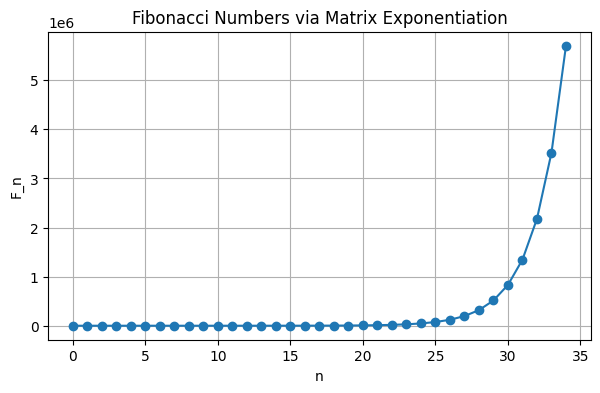

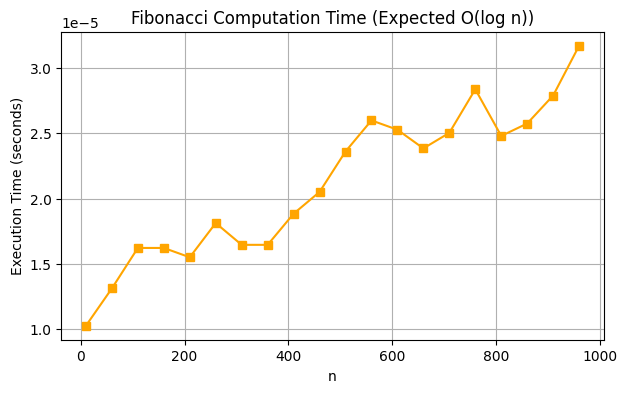

Max value = 220, chosen items = [1, 2]


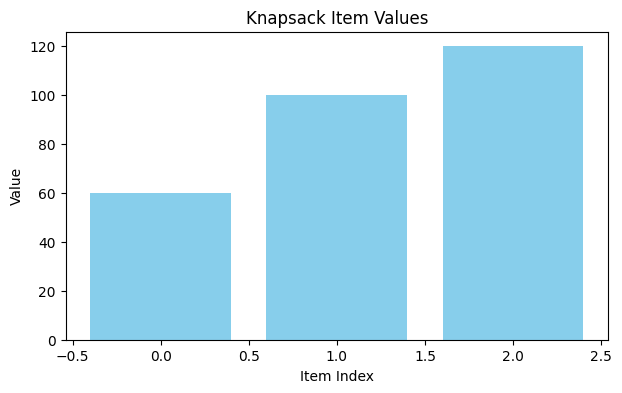

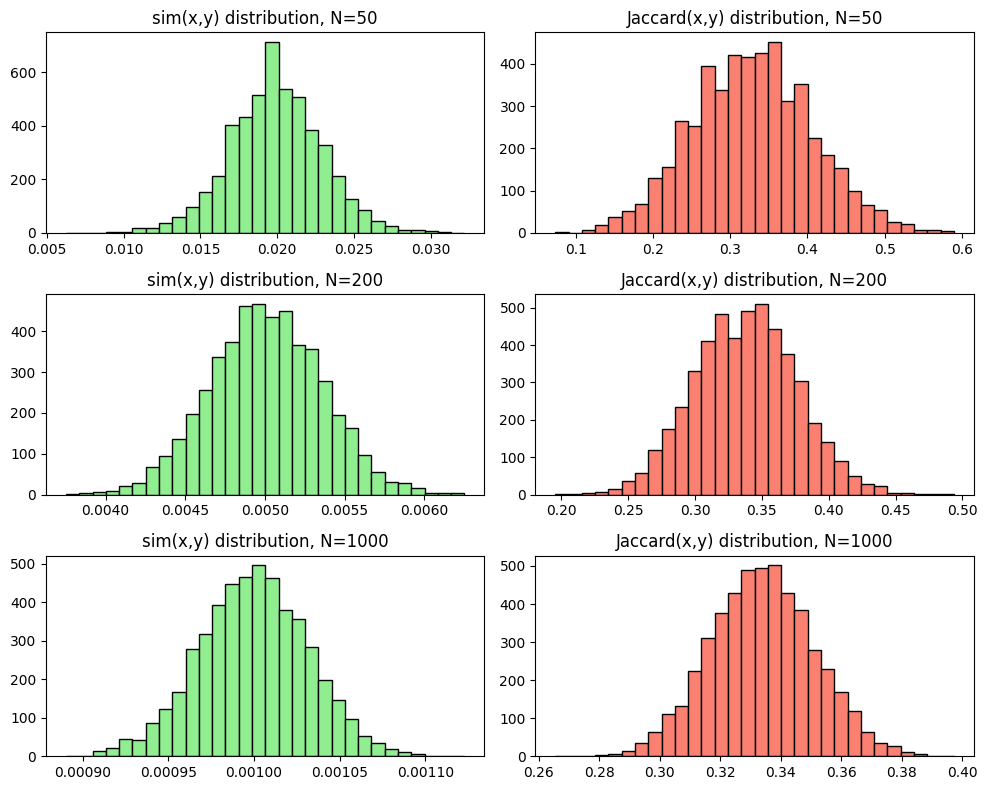

Number of possible sparse vectors (N=2000, w=5): 2.653e+14
log10(count) ≈ 14.424


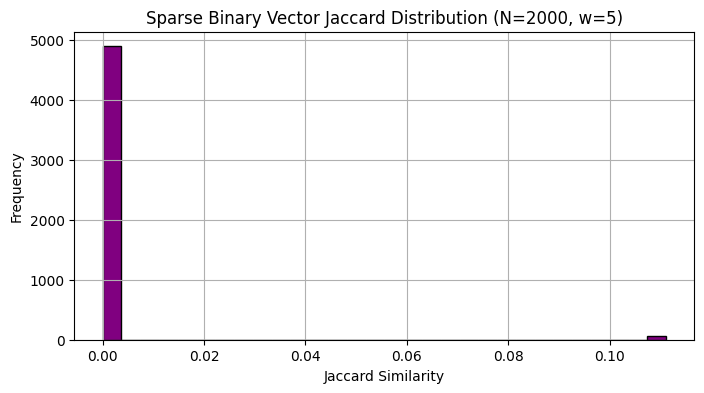

In [3]:
# Author: Aibek Zhazykbek
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
#problem1
def mat_mult(A, B):
    return (
        A[0]*B[0] + A[1]*B[2],
        A[0]*B[1] + A[1]*B[3],
        A[2]*B[0] + A[3]*B[2],
        A[2]*B[1] + A[3]*B[3]
    )

def mat_pow(M, n):
    result = (1,0,0,1)  # Identity matrix
    base = M
    exp = n
    while exp > 0:
        if exp & 1:
            result = mat_mult(result, base)
        base = mat_mult(base, base)
        exp >>= 1
    return result

def fib_matrix(n):
    if n == 0:
        return 0
    M = (1,1,1,0)
    P = mat_pow(M, n-1)
    return P[0]  # F_n
ns = list(range(0, 35))
fib_vals = [fib_matrix(n) for n in ns]

plt.figure(figsize=(7,4))
plt.plot(ns, fib_vals, marker='o')
plt.title("Fibonacci Numbers via Matrix Exponentiation")
plt.xlabel("n")
plt.ylabel("F_n")
plt.grid(True)
plt.show()
times = []
for n in range(10, 1000, 50):
    start = time.time()
    fib_matrix(n)
    times.append(time.time() - start)

plt.figure(figsize=(7,4))
plt.plot(range(10, 1000, 50), times, marker='s', color='orange')
plt.title("Fibonacci Computation Time (Expected O(log n))")
plt.xlabel("n")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()

#problem2
def knapsack_dp(values, weights, W):
    n = len(values)
    dp = [[0]*(W+1) for _ in range(n+1)]

    for i in range(1, n+1):
        for w in range(W+1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w],
                               dp[i-1][w-weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]
    w = W
    chosen = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            chosen.append(i-1)
            w -= weights[i-1]
    chosen.reverse()
    return dp[n][W], chosen
#dataset
values = [60, 100, 120]
weights = [10, 20, 30]
W = 50
max_val, chosen = knapsack_dp(values, weights, W)
print(f"Max value = {max_val}, chosen items = {chosen}")
plt.figure(figsize=(7,4))
plt.bar(range(len(values)), values, color='skyblue')
plt.title("Knapsack Item Values")
plt.xlabel("Item Index")
plt.ylabel("Value")
plt.show()

#problem3
def generate_binary_vectors(num_vectors, N, p=0.5):
    return (np.random.rand(num_vectors, N) < p).astype(int)

def sim_func(x, y):
    return np.dot(x, y) / (np.sum(x) * np.sum(y) + 1e-10)

def jaccard(x, y):
    inter = np.sum(np.logical_and(x, y))
    union = np.sum(np.logical_or(x, y))
    return inter / (union + 1e-10)

def similarity_experiment(N):
    vecs = generate_binary_vectors(100, N)
    sims, jaccs = [], []
    for i in range(len(vecs)):
        for j in range(i+1, len(vecs)):
            sims.append(sim_func(vecs[i], vecs[j]))
            jaccs.append(jaccard(vecs[i], vecs[j]))
    return np.array(sims), np.array(jaccs)

Ns = [50, 200, 1000]
plt.figure(figsize=(10, 8))

for idx, N in enumerate(Ns, 1):
    sims, jaccs = similarity_experiment(N)
    plt.subplot(len(Ns), 2, 2*(idx-1)+1)
    plt.hist(sims, bins=30, color='lightgreen', edgecolor='black')
    plt.title(f"sim(x,y) distribution, N={N}")

    plt.subplot(len(Ns), 2, 2*(idx-1)+2)
    plt.hist(jaccs, bins=30, color='salmon', edgecolor='black')
    plt.title(f"Jaccard(x,y) distribution, N={N}")

plt.tight_layout()
plt.show()
#vectors case
N_sparse = 2000
w_sparse = 5
num_vectors = math.comb(N_sparse, w_sparse)
print(f"Number of possible sparse vectors (N=2000, w=5): {num_vectors:.3e}")
print(f"log10(count) ≈ {math.log10(num_vectors):.3f}")
def generate_sparse_vectors(num_vectors, N, w):
    V = np.zeros((num_vectors, N), dtype=int)
    for i in range(num_vectors):
        ones = np.random.choice(N, w, replace=False)
        V[i, ones] = 1
    return V

vecs_sparse = generate_sparse_vectors(100, N_sparse, w_sparse)
sims_sp, jacc_sp = [], []
for i in range(100):
    for j in range(i+1, 100):
        sims_sp.append(sim_func(vecs_sparse[i], vecs_sparse[j]))
        jacc_sp.append(jaccard(vecs_sparse[i], vecs_sparse[j]))

plt.figure(figsize=(8,4))
plt.hist(jacc_sp, bins=30, color='purple', edgecolor='black')
plt.title("Sparse Binary Vector Jaccard Distribution (N=2000, w=5)")
plt.xlabel("Jaccard Similarity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
